# Install MM Detection and try simple inference

<img src=https://i.imgur.com/wTUbVBB.png  width="400">

MMDetection 是商湯和港中文大學針對物件偵測推出的一個開源工具箱，它基於 PyTorch 實現了大量的物件偵測算法，目前支援了 11 種 Backbone、56 種物件偵測算法(還在更新)：

- Backbone: VGG、ResNet、Swin 等
- Anchor-based: R-CNN 系列、YOLOv3、SSD、RetinaNet 等
- Anchor-free: FCOS、ATSS、YOLOX 等
- Transformer: DETR 等

這個工具箱把資料集建構、模型搭建、訓練策略等過程都封裝成了模塊，通過模塊調用的方式，能夠以很少的代碼量實現一個新算法，大大提高了代碼複用率。

其他說明可以參考README.md

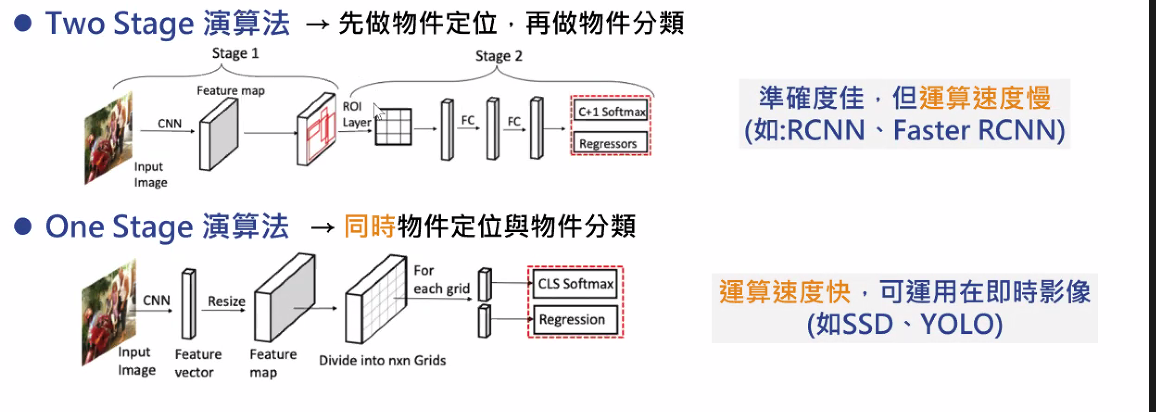


## 1.安裝 MM Detection

推薦使用 MIM 來安裝 MMDetection

In [1]:
!pip install openmim
!mim install mmdet==2.24.1

     |████████████████████████████████| 82 kB 135 kB/s eta 0:00:01
  Created wheel for openmim: filename=openmim-0.1.5-py2.py3-none-any.whl size=42502 sha256=0baa01dc0f9f9238cc589df55c6a843aa9a3aaaf015b93955a256553480373e7
  Stored in directory: /home/jovyan/.cache/pip/wheels/16/8b/e1/bdebbbc687aa50224a5ce46fe97a040a0c59f92b34bfc750b6
Successfully built openmim
  Attempting uninstall: Click
    Found existing installation: click 8.0.1
    Uninstalling click-8.0.1:
      Successfully uninstalled click-8.0.1
installing mmdet from https://github.com/open-mmlab/mmdetection.git.
Cloning into '/tmp/tmpjjcx7jzb/mmdetection'...
remote: Enumerating objects: 24787, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 24787 (delta 1), reused 5 (delta 0), pack-reused 24771
Receiving objects: 100% (24787/24787), 37.71 MiB | 14.00 MiB/s, done.
Resolving deltas: 100% (17364/17364), done.
Note: checking out '73b4e65a6a30435ef6a35f405e3474a4

In [7]:
import mmdet,mmcv
print(mmdet.__version__)
print(mmcv.__version__)

2.24.1
1.5.1


In [ ]:
# 如果沒有指定mmdet版本，有部分要修正
# import mim
# mim_path=mim.__path__[0]
# !sed -i 's/if collection_name:/if collection_name and collection_name in name2collection.keys():/' {mim_path}/commands/search.py

會自動安裝dependent的套件，但pytorch要先裝好歐

後面就可以來試跑Prime Sample Attention (PISA) in Object Detection 模型順便驗證安裝

## 2.下載預訓練模型

使用```mim download --config 模型設定名稱```指令可以下載指定的設定檔、還有相應的預訓練模型。

若加上```--dest 位置```可以指定下載的位置，"."就是開啟這份code的位置。

載一遍就好了，但若是在Colab上網頁重開要重載

In [1]:
!mkdir downloads
!mim download mmdet --config pisa_faster_rcnn_x101_32x4d_fpn_1x_coco --dest ./downloads

processing pisa_faster_rcnn_x101_32x4d_fpn_1x_coco...
pisa_faster_rcnn_x101_32x4d_fpn_1x_coco-e4accec4.pth exists in /home/jovyan/course/pisa-simple-example/downloads
Successfully dumped pisa_faster_rcnn_x101_32x4d_fpn_1x_coco.py to /home/jovyan/course/pisa-simple-example/downloads


In [1]:
# !mim download mmdet --config faster_rcnn_x101_32x4d_fpn_1x_coco --dest ./downloads

processing faster_rcnn_x101_32x4d_fpn_1x_coco...
  [####################################]  100%          
Successfully downloaded faster_rcnn_x101_32x4d_fpn_1x_coco_20200203-cff10310.pth to /home/jovyan/course/pisa-simple-example
Successfully dumped faster_rcnn_x101_32x4d_fpn_1x_coco.py to /home/jovyan/course/pisa-simple-example


若想試試其他模型可以到資料中路徑中去查找 https://github.com/open-mmlab/mmdetection/tree/master/configs

mmdet可以用很簡單的工具```init_detector(設定檔名稱,預訓練weight路徑或網址, device=指定運行的裝置)```來將模型載入指定裝置例如'cpu'或者'cuda'。

In [2]:
from mmdet.apis import init_detector, inference_detector,show_result_pyplot

config_file = './downloads/pisa_faster_rcnn_x101_32x4d_fpn_1x_coco.py'
checkpoint_file ="./downloads/pisa_faster_rcnn_x101_32x4d_fpn_1x_coco-e4accec4.pth"
device = 'cuda:0'
# init a detector
model = init_detector(config_file, checkpoint_file, device=device)

load checkpoint from local path: ./downloads/pisa_faster_rcnn_x101_32x4d_fpn_1x_coco-e4accec4.pth


model載入後除了一般Pytorch屬性之外還有很多mmdet自己家的屬性，可以用dir(model)慢慢研究

In [3]:
# 看一下預訓練模型有多少class，範例是用coco訓練的
len(model.CLASSES)

80

下載一下資料吧

In [4]:
!mkdir -p data/coco
!curl -L "https://public.roboflow.com/ds/teSUuBdtOy?key=MSfxYe5Fz3" > data/coco/roboflow.zip
!unzip -o data/coco/roboflow.zip -d data/coco
!rm -rf data/coco/roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   888  100   888    0     0    952      0 --:--:-- --:--:-- --:--:--   951
  0 78.6M    0  9553    0     0   5686      0  4:01:43  0:00:01  4:01:42  5686
curl: (23) Failed writing body (5 != 1366)
Archive:  data/coco/roboflow.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of data/coco/roboflow.zip or
        data/coco/roboflow.zip.zip, and cannot find data/coco/roboflow.zip.ZIP, period.


設定一個檔案來隨機觀看train資料夾用模型推論完後結果

In [7]:
from glob import glob
from numpy.random import choice
imgs=glob('data/coco/train/*.jpg')
def random_show_inference(model,
                      score_thr=0.2,
                      font_size=32):
# inference the demo image
    # 選照片
    img=choice(imgs)
    # 推論結果
    result = inference_detector(model, img)
    # 篩出有被model判斷出來的類別，並列表置信度
    list_contents=lambda rs: (model.CLASSES[rs[0]],list(rs[1][:,-1])) if len(rs[1])!=0 else None
    content=[_ for _ in map(list_contents,enumerate(result)) if _!=None]
    print(*content,sep="\n")
    # 取一個置信度閾值並畫出結果
    model.show_result(img, result,
                      score_thr=score_thr,
                      show=True,
                      text_color=(200, 200, 200),
                      font_size=font_size)

/opt/conda/lib/python3.7/site-packages/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


('stop sign', [0.11206635])
('suitcase', [0.083664455])
('cake', [0.061727937])
('bed', [0.24660325])
('dining table', [0.07181742])
('laptop', [0.21419522])
('refrigerator', [0.06248694])
('book', [0.1849813])


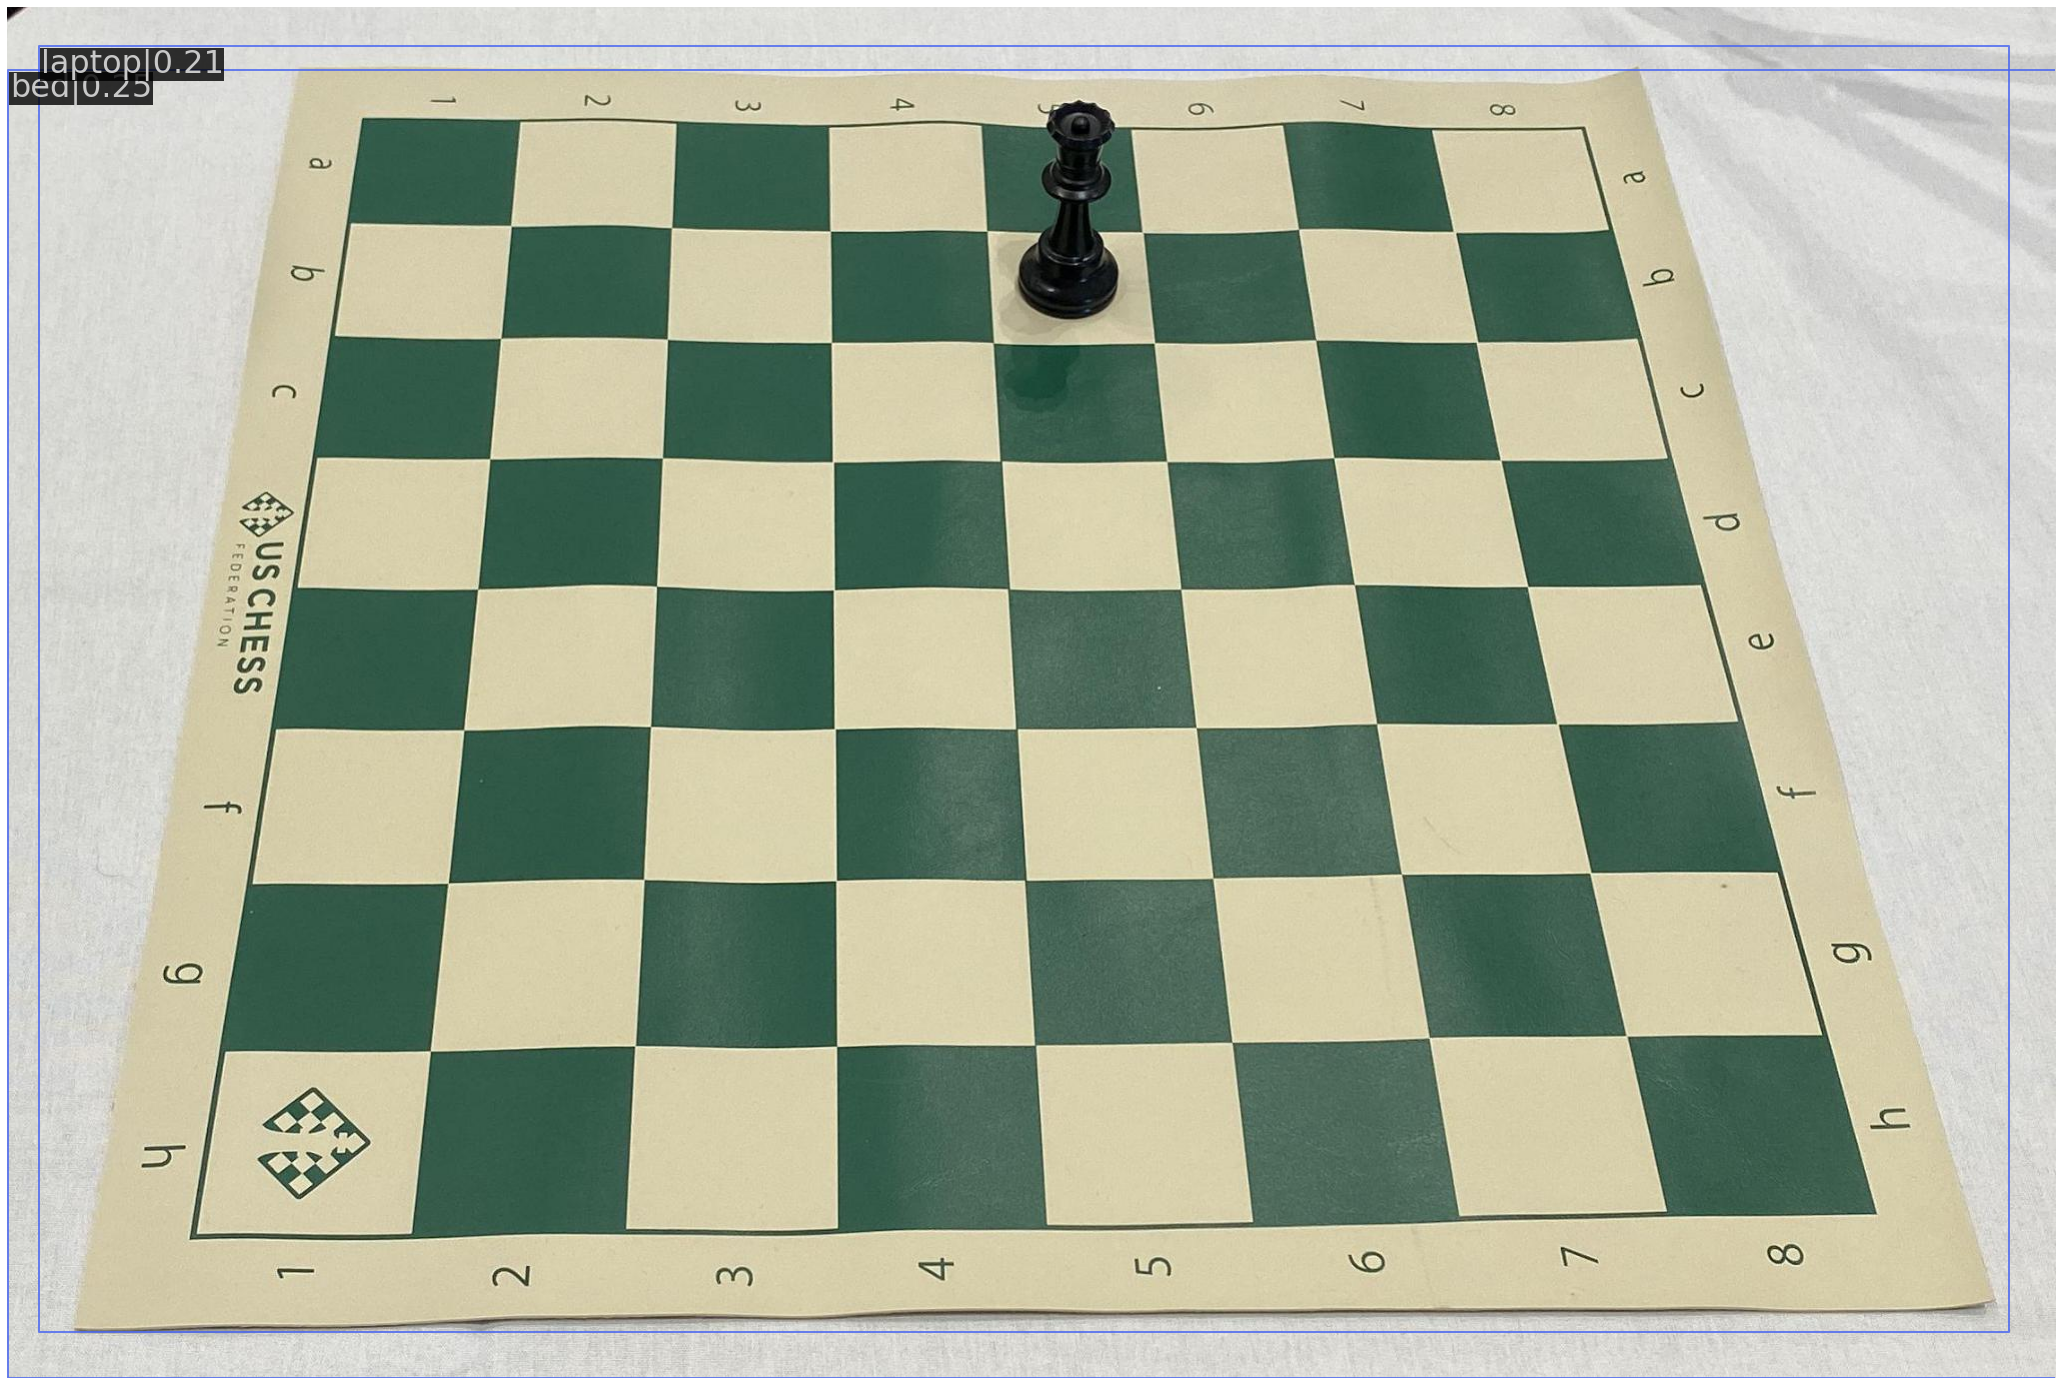

In [8]:
random_show_inference(model)

## Exercise

1. 請修改threshold試試看對inference有何影響

In [ ]:
#hint
random_show_inference(???)

2. 請試著使用其他的模型設定跑跑看

In [ ]:
#hint: 
# 參考config裡面現成的 config組合 https://github.com/open-mmlab/mmdetection/tree/master/configs
# 參考model zoo https://mmdetection.readthedocs.io/en/v2.21.0/model_zoo.html
!mim ?????
model = ????
random_show_inference(model)

## Reference

* [MMDetection Github](https://github.com/open-mmlab/mmdetection)
* [MMDetection 官方說明](https://mmdetection.readthedocs.io/en/v2.21.0/)
* [我們的github](https://github.com/ShuYuHuang/pisa-simple-example)